# Data Analysis about US Police Involved Fatalities
 The main aim of this analysis is to provide an insight and significant informations about who were killed by police in United States. 
 It's interesting to know if, through an objective analysis, there's any prejudice against some people who belong to a specifical race or not. 
 
 Something important to know: 
 - The dataset shows data collected between year 2000 and year 2015
 - We can't related the result in absolute values  but only concerned to what we found in the dataset 

______________________________________________________________________________________________________________________________________________________________________________________________________________

1. Import CSV 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://query.data.world/s/l5sl6g6cqkag3dgwl2fcjlrua7syyu', encoding='latin1')

df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False


2. Instantiate the support class that own the export and extract data from df logic

In [2]:
from export_plot import ExportPlot
from extract_data_from_dataset import ExtractData

export_obj = ExportPlot('./fig')
extract_data_obj = ExtractData(df) 

3. Inspecting the data values and specifical types. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


4. After the exploration we need to correct some datas from type. What we do: 

- To transform to categorical variables all the values into the Column: gender, race, state, manner of death, armed. 

- To turn  date into "datetype" 

- To turn "Name" into "str"


In [4]:
df["Gender"] = df['Gender'].astype('category')

df['Gender'].value_counts()

Male      11870
Female      613
Name: Gender, dtype: int64

In [5]:
df["Race"] = df['Race'].astype('category')

df['Race'].value_counts()

White       3855
Black       2536
Hispanic    1784
Asian        173
Native       130
Other         48
Name: Race, dtype: int64

In [6]:
df["State"] = df['State'].astype('category')
df['State'].value_counts()

CA    2913
TX    1190
FL    1028
AZ     585
NY     390
LA     350
AL     326
CO     310
NC     308
WA     304
IL     301
GA     285
NV     276
OH     241
OR     212
MD     195
PA     189
MO     188
MS     176
MN     175
OK     169
TN     162
NM     162
UT     153
VA     148
MI     128
SC     127
NJ     124
MA     120
WI     109
IN     106
KY     105
KS     103
ID      88
CT      78
AK      73
AR      70
DC      61
WV      60
MT      57
ME      51
NE      50
IA      41
WY      35
SD      32
DE      32
NH      29
HI      22
VT      21
RI      20
ND      13
Name: State, dtype: int64

In [7]:
df["Manner_of_death"] = df['Manner_of_death'].astype('category')
df['Manner_of_death'].value_counts()

Shot                11800
Tasered               542
Shot and Tasered      120
Other                  29
Name: Manner_of_death, dtype: int64

In [8]:
df["Armed"] = df['Armed'].astype('category')
df['Armed'].value_counts()

Gun                                 4703
Knife                               1361
Unarmed                              400
Vehicle                              111
Toy Weapon                            69
Toy weapon                            29
Machete                               16
Unknown Weapon                        15
Sword                                  8
Hammer                                 7
Box Cutter                             7
Axe                                    6
Tasered                                6
Baseball Bat                           6
Hatchet                                5
Metal Pipe                             5
Gun And Knife                          3
Guns And Explosives                    3
Crossbow                               3
Screwdriver                            3
Blunt Object                           2
Brick                                  2
Baton                                  2
Scissors                               2
Metal Stick     

5. The values inside "Armed" are counted in a incorrect way caused by the case sensitivity. We need to normalize them. The way more simple is to change all the values in lowercase form. Then turn it into a categorical variable.

In [9]:
df['Armed'] = df['Armed'].astype('str')
listWithArmedLowerCase = list(df['Armed'])

for i in range(len(listWithArmedLowerCase)):
    if listWithArmedLowerCase[i] != 'nan':
        listWithArmedLowerCase[i] = str(listWithArmedLowerCase[i])
        listWithArmedLowerCase[i] = listWithArmedLowerCase[i].lower()
    else: listWithArmedLowerCase[i] = None

df['Armed'] = listWithArmedLowerCase

df["Armed"] = df['Armed'].astype('category')
df['Armed'].value_counts()


gun                                 4703
knife                               1361
unarmed                              400
vehicle                              111
toy weapon                            98
machete                               16
unknown weapon                        15
sword                                  8
box cutter                             7
hammer                                 7
axe                                    6
baseball bat                           6
tasered                                6
metal pipe                             5
hatchet                                5
gun and knife                          3
screwdriver                            3
guns and explosives                    3
crossbow                               3
blunt object                           2
shovel                                 2
metal stick                            2
baton                                  2
chain saw                              2
scissors        

6. Then I finish to normalizing data with the change of the value as "City", "Date" and "Name". 

In [10]:
df['City'] = df['City'].astype('str')

In [11]:
df["Date"] = df['Date'].astype('datetime64')
df['Name'] = df['Name'].astype('str')

7. After the normalization we can start to extract the data and interrogate the dataset. 
We did 7 queries on dataset to discover insightful informations. 

The first query is about a specific attribute related to the victims, that is the type of weapon that belonged to the victims when they were killed. 

-  "Gun" is the most used weapon mainly to victims related to the race "White" and "Black"
-  Black people are also the most unarmed victims, followed by hispanic and white people.

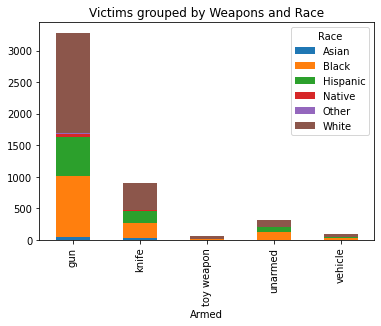

In [22]:
dfByArmedAndRace = extract_data_obj.groupByArmedAndRaceDF()
 
plot = dfByArmedAndRace.plot.bar(stacked=True, title='Victims grouped by Weapons and Race')

export_obj.save(plot, 'victim_grouped_Armed_Race.png')

We investigate also the manner of death by race to understand if there are any choices related to race preferences. 
- The majority of the victims are killed by shooting 
- Most victims by shot are white people 
- Black people formed the majority of victmis killed by teaser 

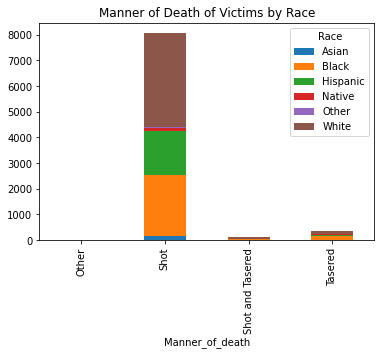

In [24]:
dfByMannerOfDeathAndRace = extract_data_obj.groupByMannerOfDeathAndRaceDF()

plot = dfByMannerOfDeathAndRace.plot.bar(stacked=True, title='Manner of Death of Victims by Race')

export_obj.save(plot, 'manner_of_death_victims_by_race.png')


We can search also which are the main States where victims are killed by Police. It's interesting to see how Hispanic people are the most killed in California, followed by white and black people too. In Florida the majority of the victims are black people. Instead, in Washington victims are mainly white people.

The other States show, more or less, a balanced distribution. 

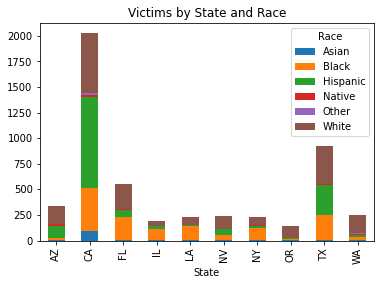

In [25]:
dfbyStateAndRace = extract_data_obj.groupByVictimsByStateAndRaceDF()
                        
plot = dfbyStateAndRace.plot.bar(stacked=True, title='Victims by State and Race')

export_obj.save(plot, 'victims_by_state_and_race.png')


According to the insight that California is the State where there are more victims, we can see that Los Angeles is the city with the biggest number of victims where are mainly Hispanic people, followed by Black and White. In Chicago, Jacksonville, New Orleans and Oackland the victmis are almost mainly Black. It's an insight that could make think to a race prejudice or to significant racial issues. However, without the overall population classifications, we cannot be sure about it.

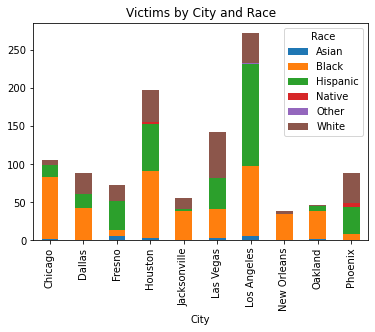

In [21]:
dfByCityAndRace = extract_data_obj.groupByVictimsByCityAndRaceDF()

plot = dfByCityAndRace.plot.bar(stacked=True, title='Victims by City and Race')

export_obj.save(plot, 'victims_by_city_and_race.png')


The violence is growing trough the years as we can see below. 

It seems that 2015 is the most violent year 

By the way we need to remember that data are partial and consider that during the years they probably have been collected in different ways. 

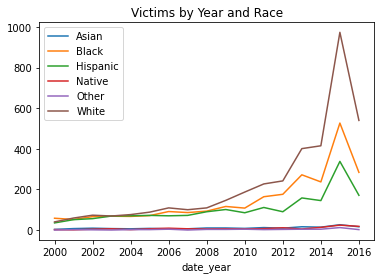

In [26]:
dfByRaceAndDate = extract_data_obj.victimsByYearAndRaceDF()
 
dfByRaceAndDate = dfByRaceAndDate.groupby('Race')['count'].plot(legend=True, title='Victims by Year and Race')

export_obj.save(plot, 'victims_by_year_and_race.png')

We investigate about female victims by race. There are not significant insights to highlight. 

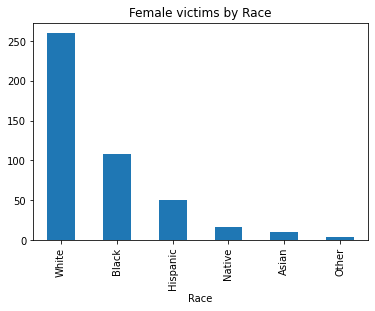

In [27]:
dfOnlyFemaleByRace = extract_data_obj.onlyFemaleVictimsByRaceDF()   

plot = dfOnlyFemaleByRace.plot.bar(stacked=True, title='Female victims by Race')

export_obj.save(plot, 'only_female_victims_by_race.png')

We analyze also the correlation between mental illness and the fatalities. 
The majority of the victims are not affected by mental illness. 

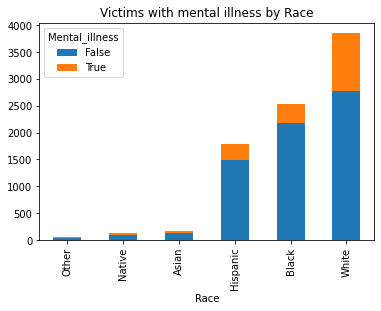

In [28]:
dfMentalIllnessByRace = extract_data_obj.mentalIllnessPresenceByRaceDF() 

plot = dfMentalIllnessByRace.plot.bar(stacked=True, title='Victims with mental illness by Race')

export_obj.save(plot, 'mental_illness_presence_by_race.png')

Conclusions: 
- The majority of the victims are properly distributed, and it doesn't seems that are particular racial issues base on the data available
- Some States and Cities show a strong persistence against Black and Hispanic people
- With more data related to the population composition, we can find out some interesting ipothesis